# Demonstrating the Central Limit Theorem (CLT)

## Introduction

- The **Central Limit Theorem (CLT)** tells us that the average of multiple random variables (RVs) tends to converge towards a Gaussian/Normal Distribution, as we increase the number of RVs averaged together

- The CLT fascinates me, mainly because **it works regardless of the shape of the original RVs**. In other words, if we take a significant number of RVs that are not gaussian-shaped and average them together, the resulting variable will behave pretty similar to a Gaussian Distribution

- Surprisingly, even if we take just a couple RVs (e.g. six RVs in our example) and average them together, it will give us a pretty good approximation of a typical Gaussian Distribution

- The CLT is a key concept in Statistics and it helps us to solve a lot of complex problems

### What are we going to do?

1. Firstly, we are going to generate 100 gaussian distributed random values, with mean equal to 0 and standard deviation equal to 0.5. Then, we will see how a typical gaussian cumulative distribution function (CDF) looks like


2. We are going to create six different RVs:

  > RVs --> { X1, X2, X3, X4, X5, X6 }

  - Their values range from -2.5 to 2.5 and they are all uniformly distributed (i.e. all values has the same probability of occurence and they are not gaussian distributed)
  - We will plot a CDF for each RV to show that they are uniformly distributed, indeed


3. We are going to average both X1 and X2 RVs together and see the resulting CDF shape

4. We are going to average X1, X2 and X3 RVs together and see the resulting CDF shape

5. We are going to average all the six RVs together and see the resulting CDF shape

6. Finally, we are going to check if the resulting variable (i.e. the variable that is a product of all six RVs averaged together) is indeed normally distributed. Thus, we are going to do the following normality tests:
  - Q-Q Plot
  - Shapiro-Wilk Test


### Objective

- We are going to show that as we increase the number of RVs averaged together, the resulting averaged varible will tend to converge towards a Gaussian/Normal distribution

- To show this, we are going to compare the shape of the averaged RVs CDFs to a typical gaussian CDF, as we increase the number of RVs averaged together

## Typical Gaussian CDF

- We are going to see below that a Gaussian CDF has a typical **S-like** shape

- We will create 100 random gaussian values, with mean equal to 0 and standard deviation equal to 0.5

- It is important to keep this CDF shape in mind, so we can compare it with the other CDF shapes that will be plotted later

In [1]:
# Creating 100 random gaussian values, with mean = 0 and sd = 0.5:
random_normal_values <- rnorm(100,mean=0,sd=0.5)

In [2]:
# Computing the cumulative frequency values for the normally distributed values:
random_normal_cdf <- ecdf(random_normal_values)

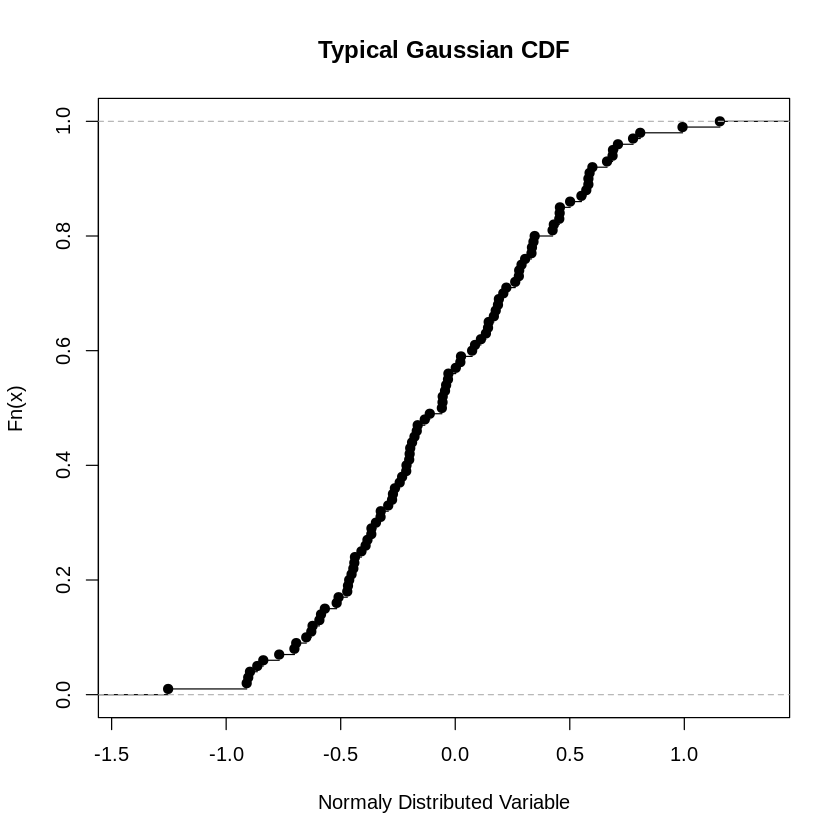

In [3]:
# Plotting the gaussian CDF:
plot(random_normal_cdf,
main='Typical Gaussian CDF',
 xlab='Normaly Distributed Variable')

## Random Variables CDFs

### Creating Random Variables

- Firstly, we are going to create a sequence (i.e. **`seq_pop`**) of several numbers between -2.5 and 2.5

- Then, we will create six different RVs, so that each RV will be a random sample (without replacement) of the sequence that we already have created

- Each RV has 100 values ranging from -2.5 to 2.5

- The RVs are denoted as **`Xi`**, where i = 1,2,...,6

In [5]:
# Creating a sequence of several values ranging from -2.5 to 2.5:
seq_pop <- seq(-2.5,2.5,by=0.01)

In [6]:
# Creating "X1" variable:
X1 <- sample(seq_pop,100,replace=F)

# Creating "X1" variable:
X2 <- sample(seq_pop,100,replace=F)

# Creating "X1" variable:
X3 <- sample(seq_pop,100,replace=F)

# Creating "X1" variable:
X4 <- sample(seq_pop,100,replace=F)

# Creating "X1" variable:
X5 <- sample(seq_pop,100,replace=F)

# Creating "X1" variable:
X6 <- sample(seq_pop,100,replace=F)

### Plotting Random Variables CDFs

- Now, we are going to plot the CDFs for each RV that we have created

- Note that all of them are uniformly distributed and not gaussian distributed. In other words, their CDFs are very close to straight inclined lines

In [7]:
# Creating a function to set plot dimensions:
options(repr.plot.width=6, repr.plot.height=4)
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

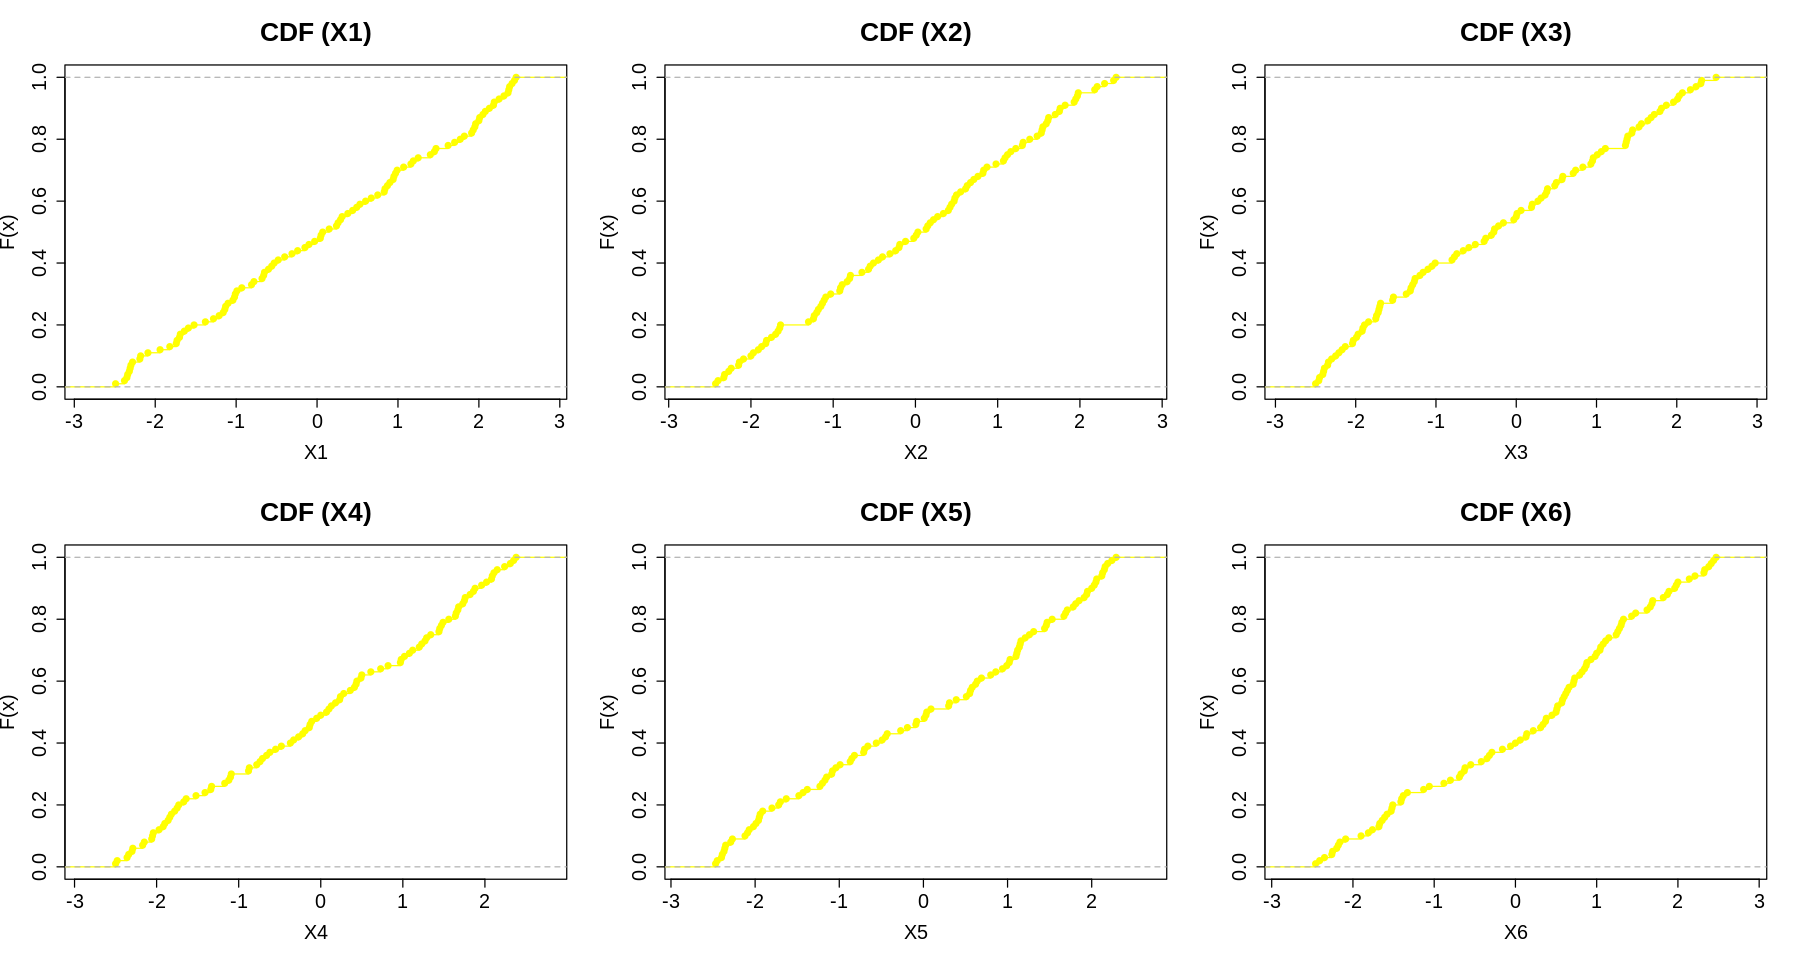

In [9]:
# Graphics layout:
set_plot_dimensions(15,8)
par(mfrow=c(2,3))

# Plotting the X1 CDF:
X1_cdf <- ecdf(X1)
plot(X1_cdf,
main='CDF (X1)',
 xlab='X1',ylab='F(x)',cex.axis=1.5,
 cex.main=2,cex.lab = 1.5,cex = 1,col='yellow')

# Plotting the X2 CDF:
X2_cdf <- ecdf(X2)
plot(X2_cdf,
main='CDF (X2)',
 xlab='X2',ylab='F(x)',cex.axis=1.5,
 cex.main=2,cex.lab = 1.5,cex = 1,col='yellow')

# Plotting the X3 CDF:
X3_cdf <- ecdf(X3)
plot(X3_cdf,
main='CDF (X3)',
 xlab='X3',ylab='F(x)',cex.axis=1.5,
 cex.main=2,cex.lab = 1.5,cex = 1,col='yellow')

# Plotting the X4 CDF:
X4_cdf <- ecdf(X4)
plot(X4_cdf,
main='CDF (X4)',
 xlab='X4',ylab='F(x)',cex.axis=1.5,
 cex.main=2,cex.lab = 1.5,cex = 1,col='yellow')

# Plotting the X5 CDF:
X5_cdf <- ecdf(X5)
plot(X5_cdf,
main='CDF (X5)',
 xlab='X5',ylab='F(x)',cex.axis=1.5,
 cex.main=2,cex.lab = 1.5,cex = 1,col='yellow')

# Plotting the X6 CDF:
X6_cdf <- ecdf(X6)
plot(X6_cdf,
main='CDF (X6)',
 xlab='X6',ylab='F(x)',cex.axis=1.5,
 cex.main=2,cex.lab = 1.5,cex = 1,col='yellow')

## CDF - X1 & X2 Averaged Together

- Firstly, we are going to average both X1 and X2 RVs together in a new variable called **`X1_X2_mean`**

- In other words, we create an array (**`X1_X2`**) of two columns: X1 and X2. Then, we calculate the mean by each row, so we get the desired variable **`X1_X2_mean`**

- Then, we are going to plot the **`X1_X2_mean`** CDF

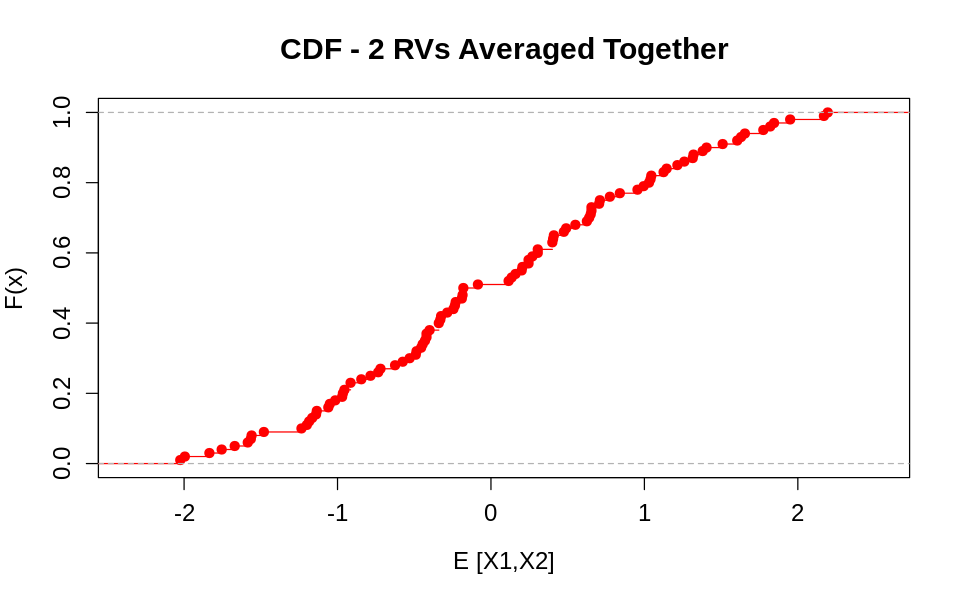

In [10]:
# Creating the "X1_X2" array:
X1_X2 <- cbind(X1,X2)

# Averaging both X1 and X2 together to produce "X1_X2_mean":
X1_X2_mean <- rowMeans(X1_X2)

# Computing cummulative frequency values of "X1_X2_mean":
X1_X2_cdf <- ecdf(X1_X2_mean)

# Setting plot dimensions:
set_plot_dimensions(8,5)

# Plotting the resulting CDF:
plot(X1_X2_cdf,
main='CDF - 2 RVs Averaged Together',
 xlab='E [X1,X2]',ylab='F(x)',cex.axis=1.2,
 cex.main=1.5,cex.lab = 1.2,cex = 1, col="red")

### Observations

- Note that the resulting CDF(i.e. 2 RVs CDF) is kind of more similar to a S-shaped gaussian CDF, than the 1 RV uniform CDF

## CDF - X1, X2 & X3 Averaged Together

- Now, we are going to plot a new CDF of X1, X2 and X3 all averaged together, following the same steps described above

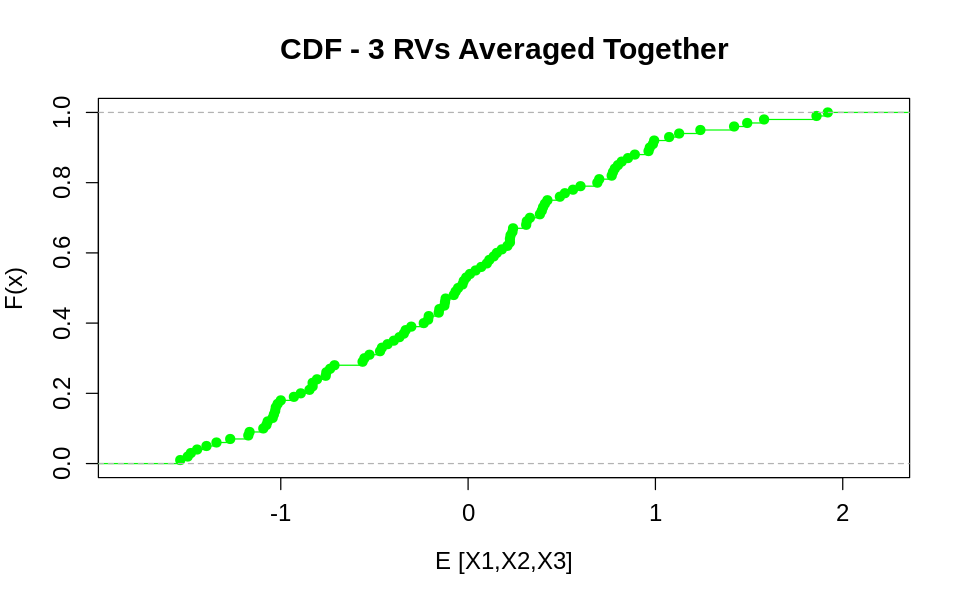

In [11]:
# Creating the "X1_X2_X3" array:
X1_X2_X3 <- cbind(X1,X2,X3)

# Averaging X1, X2 and X3 together to produce "X1_X2_X3_mean":
X1_X2_X3_mean <- rowMeans(X1_X2_X3)

# Computing cummulative frequency values of "X1_X2_X3_mean":
X1_X2_X3_cdf <- ecdf(X1_X2_X3_mean)

# Setting plot dimensions:
set_plot_dimensions(8,5)

# Plotting the resulting CDF:
plot(X1_X2_X3_cdf,
main='CDF - 3 RVs Averaged Together',
 xlab='E [X1,X2,X3]',ylab='F(x)',cex.axis=1.2,
 cex.main=1.5,cex.lab = 1.2,cex = 1, col="green")

### Observations

- Note that the resulting CDF (i.e. 3 RVs CDF) is even closer to a S-shaped gaussian CDF, than the 2 RVs CDF

## CDF - All 6 RVs Averaged Together

- Now, we are going to plot a new CDF of all the six RVs averaged together, following the same steps described above

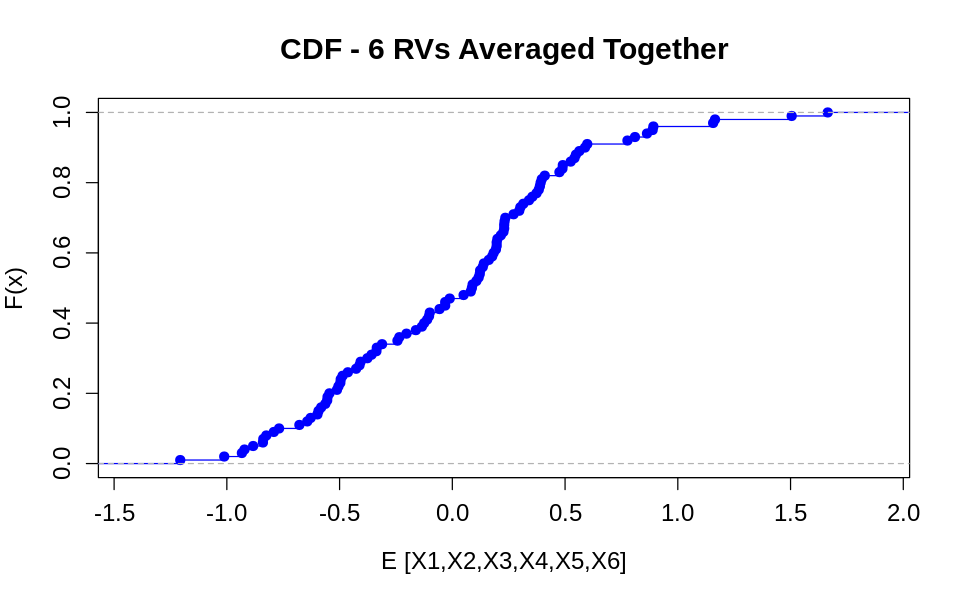

In [17]:
# Creating the "all_RV" array:
all_RV <- cbind(X1,X2,X3,X4,X5,X6)

# Averaging all the RVs together to produce "all_RV_mean":
all_RV_mean <- rowMeans(all_RV)

# Computing cummulative frequency values of "all_RV_mean":
all_RV_cdf <- ecdf(all_RV_mean)

# Setting plot dimensions:
set_plot_dimensions(8,5)

# Plotting the resulting CDF:
plot(all_RV_cdf,
main='CDF - 6 RVs Averaged Together',
 xlab='E [X1,X2,X3,X4,X5,X6]',ylab='F(x)',cex.axis=1.2,
 cex.main=1.5,cex.lab = 1.2,cex = 1, col="blue")

### Observations

- Note that the resulting CDF (i.e. 6 RVs CDF) is pretty close to a S-shaped gaussian CDF

## Comparing all the CDFs

- Now, we can compare all the CDFs that we have created

- Note that, as we increase the number of RVs averaged together, we get a CDF that tends to converge towards a gaussian typical CDF

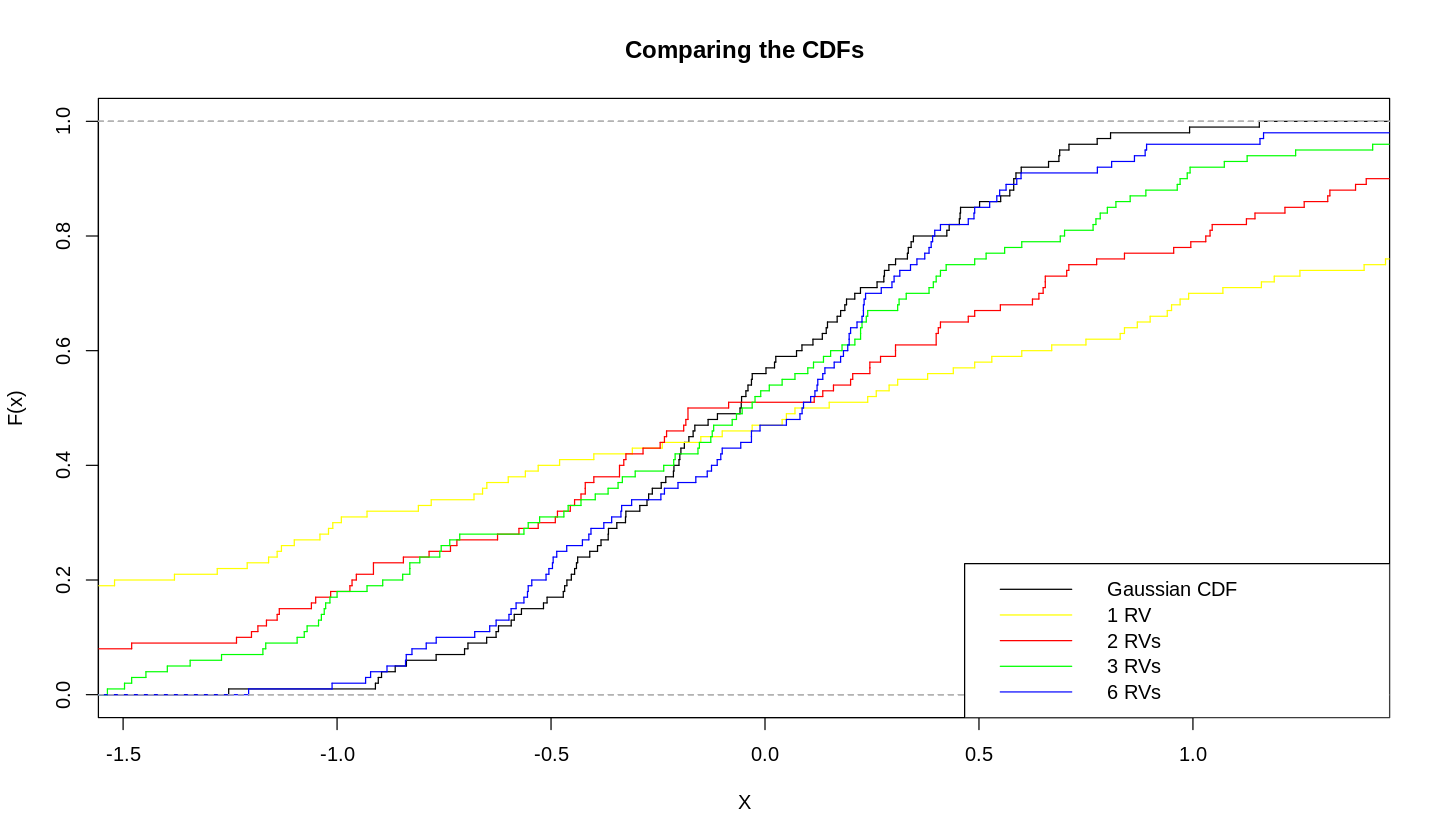

In [25]:
# Setting plot dimensions:
set_plot_dimensions(12,7)

# Plotting all the CDFs together to compare them

# Plotting the gaussian CDF
plot(random_normal_cdf,xlab="X",ylab="F(x)",main="Comparing the CDFs",lty=1,
     verticals=T,col='black',pch='.',do.points=F)

# Plotting the 1RV CDF:
lines(X1_cdf,lty=1,verticals=T,col='yellow',pch='.',do.points=F)

# Plotting the 2RVs CDF:
lines(X1_X2_cdf,lty=1,verticals=T,col='red',pch='.',do.points=F)

# Plotting the 3RVs CDF:
lines(X1_X2_X3_cdf,lty=1,verticals=T,col='green',pch='.',do.points=F)

# Plotting the 6RVs CDF:
lines(all_RV_cdf,lty=1,verticals=T,col='blue',pch='.',do.points=F)

# Setting legend parameters:
legend("bottomright",
       legend=c("Gaussian CDF","1 RV","2 RVs","3 RVs","6 RVs"),
       col=c('black','yellow','red','green','blue'),
       lty=1)

## Checking Normality

- Finally, we are going to check if the resulting variable, which is the result of the all six RVs averaged together is normally distributed

- We are going to use two methods:
  - Q-Q Plot
  - Shapiro-Wilk Test

### Q-Q Plot

- Here, we are going to plot a quantile-quantile plot, in which the Y-axis represents the observed quantiles, while the X-axis represents the theorical gaussian quantiles

- Note that the averaged variable behaves pretty similar to a gaussian distribution, indeed

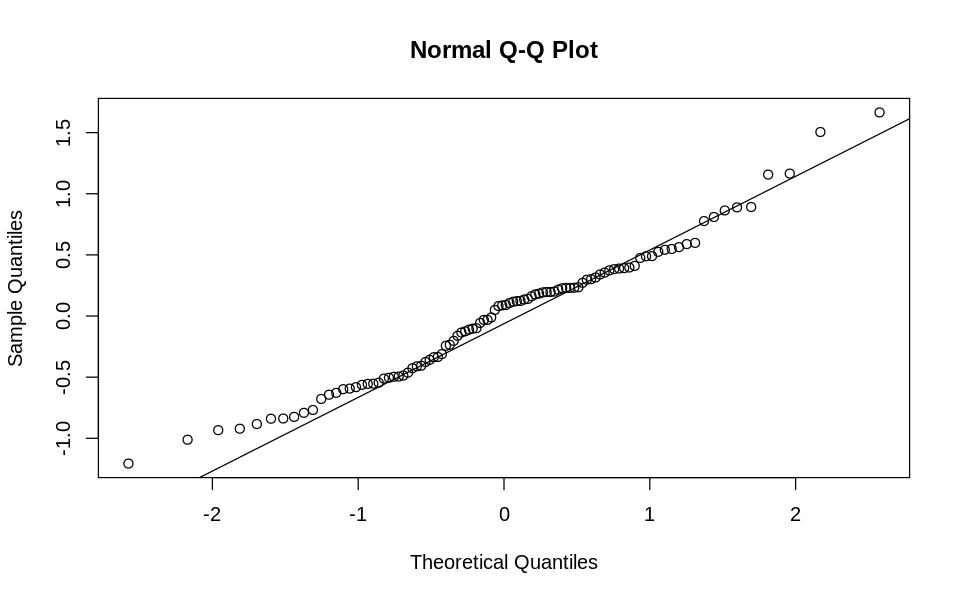

In [23]:
# Setting plot dimensions:
set_plot_dimensions(8,5)
# Plotting Q-Q plot:
qqnorm(all_RV_mean)
# Plotting the reference line:
qqline(all_RV_mean)

### Shapiro-Wilk Test

- The Shapiro-Wilk Test is an application of the hypothesis test that checks if a given variable is normally distributed or not

- The Null Hypothesis (H0) tells us that the variable is normally distributed

- The Alterative Hypothesis (Ha) tells us that the variable is not normally distributed

- Therefore, if the outputed **p-value** is less than the **alpha-value** (W), then we cannot reject the Null Hypothesis. Therefore, the given variable is normally distributed

- Otherwise, if the outputed **p-value** is greater than the **alpha-value** (W), then we can reject the Null Hypothesis. Therefore, the given variable is not normally distributed

In [24]:
# Performing the Shapiro-Wilk Test:
shapiro.test(all_RV_mean)


	Shapiro-Wilk normality test

data:  all_RV_mean
W = 0.98063, p-value = 0.1488


#### Observation

- Note that, since in our case **p-value < W**, we cannot reject the Null Hypothesis. Therefore, our averaged variable is normally distributed

## Conclusion

- In this demonstration, we could figure out that as we increase the number of RVs that are averaged together, the resulting CDF of this variable tends to converge towards a gaussian CDF

- This is exactly what the CLT tells us!

- Moreover, we do not need a large number of RVs to get a pretty good approximation of the gaussian distribution. However, as we increase the number of RVs averaged together, we will get a better approximation of the gaussian distribution